In [16]:
import yfinance as yf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
btc = yf.Ticker('BTC-USD')

In [4]:
hist = btc.history(period="max")

In [41]:
closing_prices = hist['Close'].values

In [42]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Prepare the training data
sequence_length = 30
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape X to be 3D for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [43]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.fit(X, y, batch_size=32, epochs=50)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0231
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 8.2943e-04
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 7.5772e-04
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 5.6696e-04
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 6.0484e-04
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 4.4450e-04
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 3.7641e-04
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 4.6477e-04
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 4.5202e-04
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 3.1573e-04
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.7265e-04
Epoch 12/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 2.9378e-04
Epoch 13/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 2.6514e-04
Epoch 14/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 2.

In [45]:
# Assuming you have a new sequence of 30 days
test_data = scaled_data[-sequence_length:]
test_data = np.reshape(test_data, (1, test_data.shape[0], 1))

predicted_price = model.predict(test_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
[[59174.35]]


ValueError: x and y must have same first dimension, but have shapes (70,) and (1,)

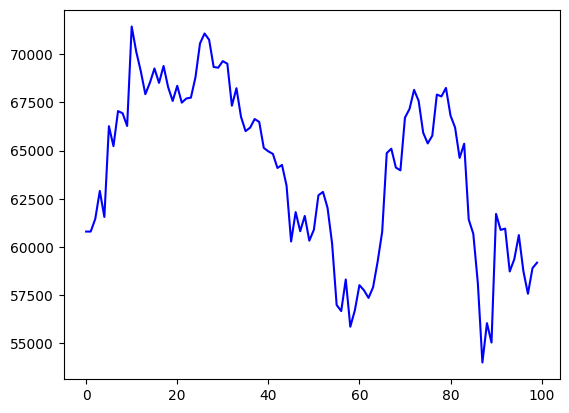

In [46]:
plt.plot(closing_prices[-100:], color='blue', label='Actual BTC Price')
plt.plot(np.arange(len(closing_prices)-70, len(closing_prices)), predicted_price.flatten(), color='red', label='Predicted BTC Price')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()
